# 02.Neural Network Classification with pytorch 


Classification is a problem of predicting whether something is one thing or another(there can be multiple things as option)  

resources :  https://github.com/mrdbourke/pytorch-deep-learning

## 1.Make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise= 0.03,
                   random_state = 42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X :\n {X[:5]}")
print(f"First 5 samples of X :\n {y[:5]}")

First 5 samples of X :
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of X :
 [1 1 1 1 0]


In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

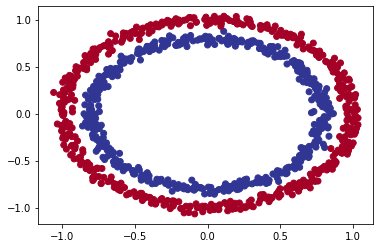

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap = plt.cm.RdYlBu);


**Note :** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to expirement but still sizeable enough to practice the fundamentals.

### 1.1 Check input output shapes 

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one Sample of X: {X_sample.shape} and the same for y :{y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one Sample of X: (2,) and the same for y :()


In [ ]:
import torch
torch.__version__

'1.13.1+cu116'

In [ ]:
type(X),X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

#### resources : 
Scikit learn test_train split : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 

In [ ]:
#split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train , y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.2,#0.2 = 20% of data will be test and 80% will train
                                                     random_state=42) # similar torch.manual_seed



In [ ]:
len(X_train),len(X_test), len(y_train),len(y_test)

(800, 200, 800, 200)

## 2.building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. setup device agonistic code so our code will run on an accelerator (GPU)if there is one.
2. construct a model(by subclassing `nn.Module`
3. define loss function and optimizer.
4. create a training and test loop

In [ ]:
import torch
from torch import nn

# Make device agonistic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train.shape

torch.Size([800, 2])

from scipy.sparse import data
Now we've setup device agnostic code let's create a model that :
1. Subclassses `nn.Module`(almose all the models in pytorch subclass `nn.Module`)
2. create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass(or forward computation) of the model_selection
4. instatiate an instance of our model class and send it to the target `device`

to visulaize : u may use this 
https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=5,1&seed=0.18103&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
# 1. construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.layer_1 = nn.Linear(in_features= 2 , out_features=5) # take in 2 feature and upscales to 5 feature
    self.layer_2 = nn.Linear(in_features = 5 , out_features=1) #take 5 in feature and downscales and output 1

#     self.two_linear_layers = nn.Sequential(
#     nn.Linear(in_features=1,out_features=5),
#     nn.Linear(in_features=5,out_features=1)
# ).to(device)
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) #x-> layer1 -> layer2 ->output
    #return self.two_linear_layers(x)
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cuda'

In [ ]:
next(model_0.parameters())

Parameter containing:
tensor([[-0.2752, -0.4045],
        [ 0.3717, -0.4584],
        [-0.1936,  0.6083],
        [-0.6784, -0.4839],
        [ 0.1195, -0.5556]], device='cuda:0', requires_grad=True)

In [ ]:
# Lets replicate the model above using nn.sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.2061,  0.2287],
                      [-0.1527,  0.5381],
                      [-0.0171,  0.1825],
                      [-0.7054,  0.5114],
                      [ 0.4238,  0.2093]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.2836,  0.4986, -0.4102,  0.4243, -0.2204], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0591,  0.0367,  0.0375,  0.2939, -0.3985]], device='cuda:0')),
             ('1.bias', tensor([0.3947], device='cuda:0'))])

In [ ]:
#make prediction
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of Prediction : {len(untrained_preds)},shape : {untrained_preds.shape}")
print(f"\nLength of test samples: {len(X_test)},shape: {X_test.shape}")
print(f"\nfirst 10 prediction :\n {untrained_preds[:10]}")
print(f"\nfirst 10 labels : \n{y_test[:10]}")

Length of Prediction : 200,shape : torch.Size([200, 1])

Length of test samples: 200,shape: torch.Size([200, 2])

first 10 prediction :
 tensor([[0.7869],
        [0.6645],
        [0.8285],
        [0.7763],
        [0.3849],
        [0.3136],
        [0.3204],
        [0.2371],
        [0.8471],
        [0.6514]], device='cuda:0')

first 10 labels : 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimzer

which loss function or optimizer should you  use ?

again ..... this is problem specific

For example for regression you might want MAE or MSE

For Classification :Binary cross entorpy/log loss or categorical cross entorpy (cross entropy)

As a reminder , loss functions measures how *wrong* your model predictions are.

and for optimizers, two of the most common are SGD or ADAM . However pytorch has many built in options.
https://pytorch.org/docs/stable/optim.html#algorithms

resources to read :
 
binary cross entorpy : https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

categorical cross entorpy:
https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e#:~:text=Categorical%20cross%2Dentropy%20is%20used,%5D%20for%203%2Dclass%20problem. 

In [ ]:
# Setup a loss function
#loss_fn = nn.BCELoss() # BCELoss = requires input to have to go through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss has built in sigmoid activation function


optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.1)

Accuracy is equal to
 
`true positive / (true positive + true negative) *100`

In [ ]:
# Calculate Accuracy - out of 100 examples , what percentage does our model get right?
def accuracy_fn(y_true , y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc= (correct/len(y_pred)) * 100
  return acc

## 3.Train model

to train our model , we're going to need to build a training loop 

1. forward pass
2. calculate loss
3. Optimzer zero grad
4. Loss backward (back propagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilites -> prediction labels

our model outputs are going to be raw **logits**.

we can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

then we can convert our model's prediction probabilites to **Prediction Lables** by either rounding them or taking the `argmax()`. 

In [ ]:
# View the First 5 outputs of the forward pass on the test data
model_0.eval()

with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.7869],
        [0.6645],
        [0.8285],
        [0.7763],
        [0.3849]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function our model logits to turn them into prediction probabilites.
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6872],
        [0.6603],
        [0.6960],
        [0.6849],
        [0.5951]], device='cuda:0')

For our prediction probablites values, we need to perform a range style  rounding on them:
* `y_pred_probs` >= 0.5, y=1(class 1)
* `y_pred_probs` < 0.5, y=0(class 0)

In [ ]:
#Find the predicted labels 
y_preds = torch.round(y_pred_probs)

#in full (logits -> prediction probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check equality 
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

tensor([True, True, True, True, True], device='cuda:0')


### 3.2 Building a traing and testing loop 

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set the number of epochs
epochs = 1000

# put th data to the target device 
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test, y_test = X_test.to(device) , y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  
  #forward pass
  y_logits = model_0(X_train).squeeze().to(device)
  y_pred = torch.round(torch.sigmoid(y_logits))
  
  #calculate the loss
  loss = loss_fn(y_logits,y_train)
  accuracy = accuracy_fn(y_train,y_pred)

  #optimize zero grad
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(y_test, test_pred)
  if epoch % 10 == 0:
    print(f"epoch: {epoch} | Loss: {loss:.5f} | accuracy: {accuracy:.2f} | testloss: {test_loss:.5f} | testacc: {test_accuracy:.2f} ")


epoch: 0 | Loss: 0.74367 | accuracy: 50.00 | testloss: 0.73644 | testacc: 50.00 
epoch: 10 | Loss: 0.71330 | accuracy: 50.00 | testloss: 0.70827 | testacc: 50.00 
epoch: 20 | Loss: 0.70199 | accuracy: 55.25 | testloss: 0.69782 | testacc: 57.50 
epoch: 30 | Loss: 0.69768 | accuracy: 52.50 | testloss: 0.69392 | testacc: 56.50 
epoch: 40 | Loss: 0.69597 | accuracy: 52.38 | testloss: 0.69246 | testacc: 51.00 
epoch: 50 | Loss: 0.69524 | accuracy: 51.12 | testloss: 0.69192 | testacc: 50.00 
epoch: 60 | Loss: 0.69487 | accuracy: 50.62 | testloss: 0.69173 | testacc: 51.00 
epoch: 70 | Loss: 0.69465 | accuracy: 50.12 | testloss: 0.69168 | testacc: 51.00 
epoch: 80 | Loss: 0.69449 | accuracy: 50.00 | testloss: 0.69168 | testacc: 51.00 
epoch: 90 | Loss: 0.69436 | accuracy: 49.62 | testloss: 0.69171 | testacc: 51.50 
epoch: 100 | Loss: 0.69425 | accuracy: 49.38 | testloss: 0.69176 | testacc: 52.50 
epoch: 110 | Loss: 0.69416 | accuracy: 49.38 | testloss: 0.69180 | testacc: 52.00 
epoch: 120 | Lo

## 4.Make Preditions and evaluate the model

From metrics it looks like our model isn't learning anything .....

so to inspect it lets make some predictions and make them visual!

In other words,"Visualize, Visualize , Visualize!"

To do so, We are going to import a function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path

# download helper function from Learn Pytorch repo(if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_function.py already exists, Skipping download")
else:
  print("Download helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb")as f:
    f.write(request.content)

from helper_function import plot_decision_boundary,plot_predictions


Download helper_function.py


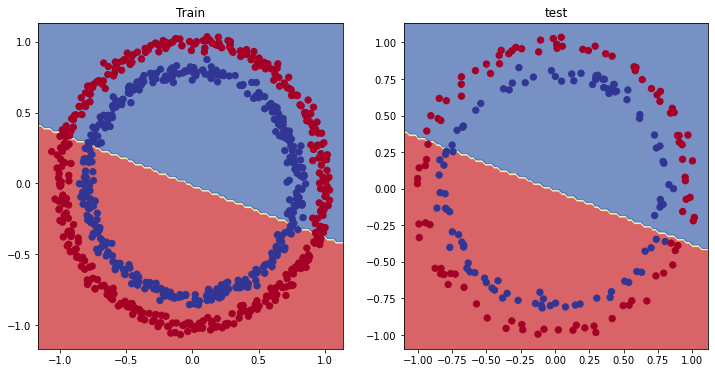

In [ ]:
#plot decision boundary of the model
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)

## 5.Improving a Model(From a model perspective)

* Add More Layers - give the model more chances to learn about patterns in the data.
* Add more hidden units - go from 5 hidden units to 10 hidden units.
* Fit for Longer
* Changing the activation functions.
* Change the learning rate : if the lr are high we may get to a **Exploding Gradient Problem and vanishing Gradient problem** 
 *https://deepai.org/machine-learning-glossary-and-terms/exploding-gradient-problem#:~:text=Exploding%20gradients%20are%20a%20problem,updates%20are%20small%20and%20controlled.*
* Changing the loss function.

These options are all from our models perspective because they deal directly with the model, Rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Lets try and improve our model by:
* Add more hidden Units: 5 ->10
* increase the number of layers:2->3 
* increase the number of epochs:100->1000

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2,10)
    self.layer2 = nn.Linear(10,10)
    self.layer3=nn.Linear(10,1)

  def forward(self,x):
    # z = self.layer1(x)
    # z = self.layer2(z)
    # z = self.layer3(z)
    # return(z)
    return self.layer3(self.layer2(self.layer1(x))) # this way of writing operation leverages the operations behind the scene.

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizer = torch.optim.Adam(params = model_1.parameters(),lr=0.1)

In [ ]:
#Writing a training and evaluation mode
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set the number of epochs
epochs = 1000

# put th data to the target device 
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test, y_test = X_test.to(device) , y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  
  #forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  
  #calculate the loss
  loss = loss_fn(y_logits,y_train)
  accuracy = accuracy_fn(y_train,y_pred)

  #optimize zero grad
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(y_test, test_pred)
  if epoch % 100 == 0:
    print(f"epoch: {epoch} | Loss: {loss:.5f} | accuracy: {accuracy:.2f} | testloss: {test_loss:.5f} | testacc: {test_accuracy:.2f} ")


epoch: 0 | Loss: 0.69396 | accuracy: 50.88 | testloss: 0.79303 | testacc: 50.00 
epoch: 100 | Loss: 0.69298 | accuracy: 51.50 | testloss: 0.69470 | testacc: 45.50 
epoch: 200 | Loss: 0.69317 | accuracy: 48.75 | testloss: 0.69505 | testacc: 47.00 
epoch: 300 | Loss: 0.69298 | accuracy: 51.12 | testloss: 0.69468 | testacc: 46.00 
epoch: 400 | Loss: 0.69298 | accuracy: 51.00 | testloss: 0.69468 | testacc: 46.00 
epoch: 500 | Loss: 0.69298 | accuracy: 51.00 | testloss: 0.69468 | testacc: 46.00 
epoch: 600 | Loss: 0.69298 | accuracy: 51.00 | testloss: 0.69468 | testacc: 46.00 
epoch: 700 | Loss: 0.69298 | accuracy: 51.00 | testloss: 0.69468 | testacc: 46.00 
epoch: 800 | Loss: 0.69298 | accuracy: 51.00 | testloss: 0.69468 | testacc: 46.00 
epoch: 900 | Loss: 0.69298 | accuracy: 51.00 | testloss: 0.69468 | testacc: 46.00 


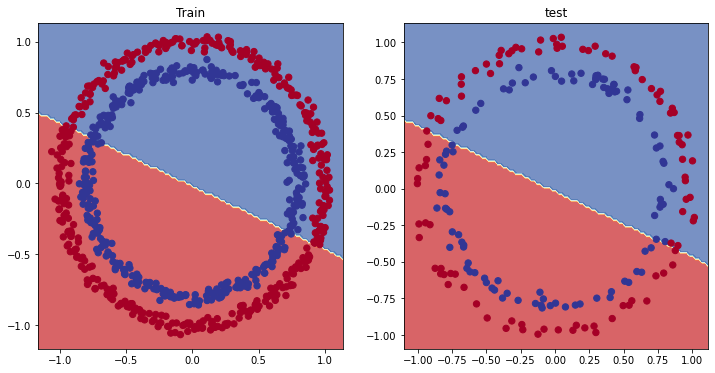

In [ ]:
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,X_test,y_test)

### 5.1preparing data to see if our model can fit a straight line

one way to troubleshoot larger problem is to test on smaller problem.

In [ ]:
#Lets create a smaller problem 
# create some data (same as notebook 01)

weight =0.7
bias =0.3
start = 0
end =1
step =0.01

#create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create a train and test split
train_split = int(0.8*len(X_regression))
X_train_regression , y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression , y_test_regression = X_regression[train_split:],y_regression[train_split:]

len(X_train_regression), len(X_test_regression)

(80, 20)

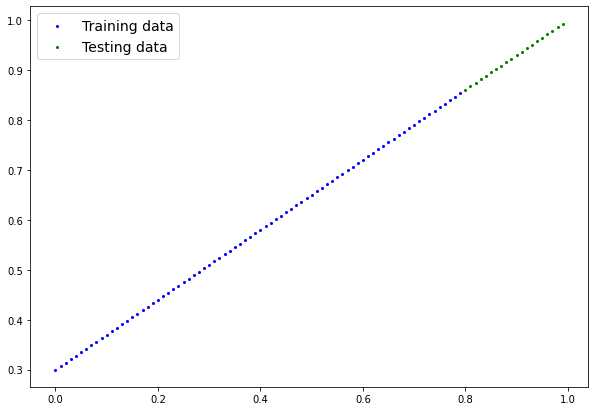

In [ ]:
plot_predictions(X_train_regression,
                 y_train_regression,
                 X_test_regression,
                 y_test_regression)

### 5.2Adjusting `model_1` to fit a straight line.

In [ ]:
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# same architecture as model_1(but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(1,10),
    nn.Linear(10,10),
    nn.Linear(10,1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(),lr=0.01)

In [ ]:
# train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs =1000
X_train_regression , y_train_regression = X_train_regression.to(device) , y_train_regression.to(device) 
X_test_regression , y_test_regression =X_test_regression.to(device) , y_test_regression.to(device)

for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)
  if epoch % 100 == 0:
    print(f"epoch: {epoch} | Loss: {loss:.5f} | testloss: {test_loss:.5f}") 


epoch: 0 | Loss: 0.75986 | testloss: 0.91103
epoch: 100 | Loss: 0.02858 | testloss: 0.00081
epoch: 200 | Loss: 0.02533 | testloss: 0.00209
epoch: 300 | Loss: 0.02137 | testloss: 0.00305
epoch: 400 | Loss: 0.01964 | testloss: 0.00341
epoch: 500 | Loss: 0.01940 | testloss: 0.00387
epoch: 600 | Loss: 0.01903 | testloss: 0.00379
epoch: 700 | Loss: 0.01878 | testloss: 0.00381
epoch: 800 | Loss: 0.01840 | testloss: 0.00329
epoch: 900 | Loss: 0.01798 | testloss: 0.00360


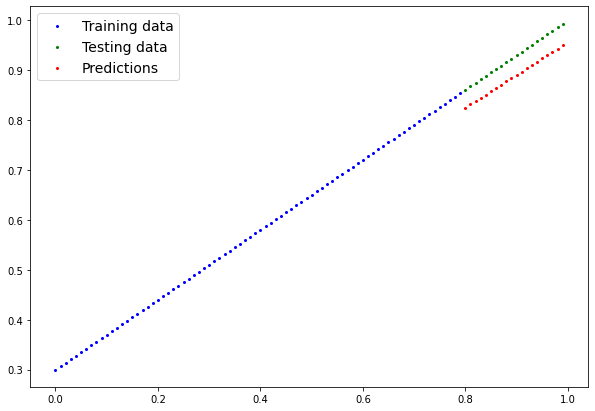

In [ ]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)
plot_predictions(X_train_regression.cpu(),
                  y_train_regression.cpu(),
                  X_test_regression.cpu(),
                  y_test_regression.cpu(),
                  y_preds.cpu());
  

## 6.missing peice : non-linearity

"what patterns could you draw if you were given an infinite amount of a straight and non straight lines?"

or in machine learning terms, an infinte(but really it is finite)of linear and non-linear functions?


### 6.1Recreating Non-linear data(red and blue circles)

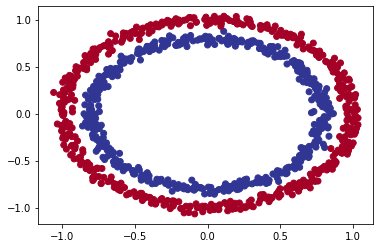

In [ ]:
#make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples =1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state =42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size= 0.2,
                                                 random_state=42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]), tensor([1., 0., 0., 0., 1.]))

### 6.2 building a model with non linearity 

* Linear = Straight lines
* Non-linear - Not straight lines

In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2,10)
    self.layer2 = nn.Linear(10,10)
    self.layer3 = nn.Linear(10,1)
    self.relu = nn.ReLU() #non linear activation function

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizer = torch.optim.Adam(params = model_3.parameters(),lr=0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train,y_train =X_train.to(device),y_train.to(device)
X_test , y_test =X_test.to(device),y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()
  
  #forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  
  #calculate the loss
  loss = loss_fn(y_logits,y_train)
  accuracy = accuracy_fn(y_train,y_pred)

  #optimize zero grad
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(y_test, test_pred)
  if epoch % 10 == 0:
    print(f"epoch: {epoch} | Loss: {loss:.5f} | accuracy: {accuracy:.2f} | testloss: {test_loss:.5f} | testacc: {test_accuracy:.2f} ")


epoch: 0 | Loss: 0.69295 | accuracy: 50.00 | testloss: 0.69203 | testacc: 55.50 
epoch: 10 | Loss: 0.68651 | accuracy: 53.00 | testloss: 0.68401 | testacc: 56.50 
epoch: 20 | Loss: 0.67698 | accuracy: 53.50 | testloss: 0.67149 | testacc: 57.00 
epoch: 30 | Loss: 0.66078 | accuracy: 60.75 | testloss: 0.65295 | testacc: 62.00 
epoch: 40 | Loss: 0.63241 | accuracy: 66.88 | testloss: 0.62340 | testacc: 70.00 
epoch: 50 | Loss: 0.58509 | accuracy: 74.25 | testloss: 0.57695 | testacc: 76.50 
epoch: 60 | Loss: 0.52041 | accuracy: 81.50 | testloss: 0.52935 | testacc: 81.00 
epoch: 70 | Loss: 0.43584 | accuracy: 90.75 | testloss: 0.45495 | testacc: 89.00 
epoch: 80 | Loss: 0.33954 | accuracy: 96.50 | testloss: 0.35861 | testacc: 95.50 
epoch: 90 | Loss: 0.24768 | accuracy: 98.50 | testloss: 0.27244 | testacc: 97.00 
epoch: 100 | Loss: 0.17334 | accuracy: 99.62 | testloss: 0.20684 | testacc: 99.00 
epoch: 110 | Loss: 0.12108 | accuracy: 99.88 | testloss: 0.15011 | testacc: 100.00 
epoch: 120 | L

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

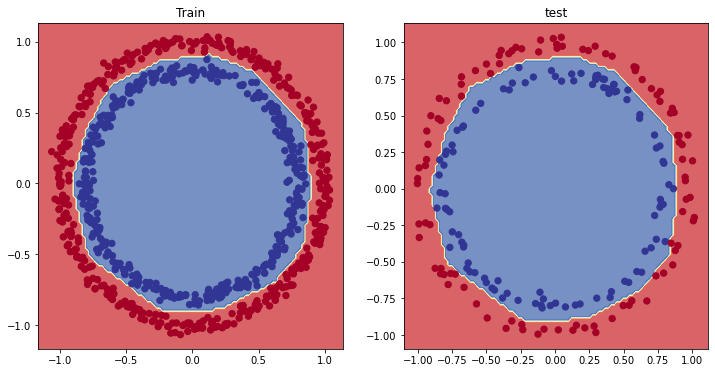

In [ ]:
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

## 7.replicating nonlinear activation function

neural network, rather than telling us the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear and non linear functions.

In [ ]:
# Create a tensor
A =torch.arange(-10,10,1, dtype =torch.float32)

A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

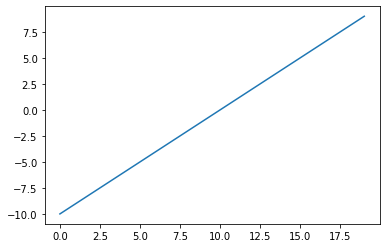

In [ ]:
plt.plot(A);

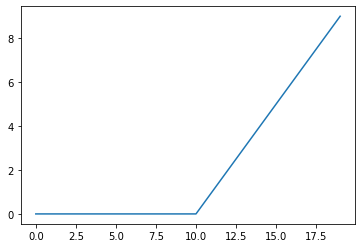

In [ ]:
plt.plot(torch.relu(A));

In [ ]:
def relu(x : torch.Tensor):
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

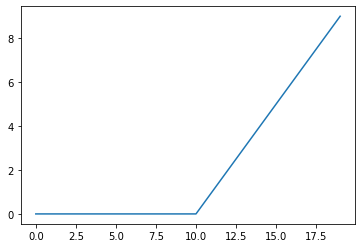

In [ ]:
plt.plot(relu(A));

In [ ]:
def sig(x):
   return 1/ (1+torch.exp(-x))

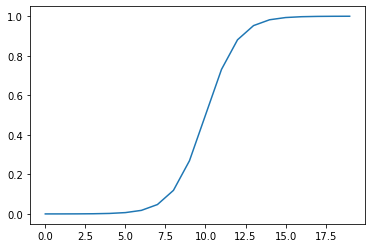

In [ ]:
plt.plot(torch.sigmoid(A));

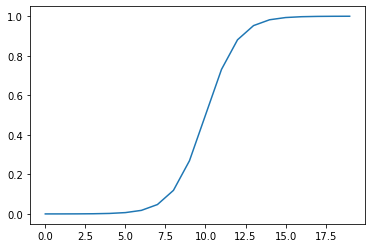

In [ ]:
plt.plot(sig(A));

## 8.Putting all together with a multi-class Classification problem 

* Binary Classification - One thing or another 

* Multiclass classification - more than one thing or another.

### 8.1 Creating a toy multi-class dataset

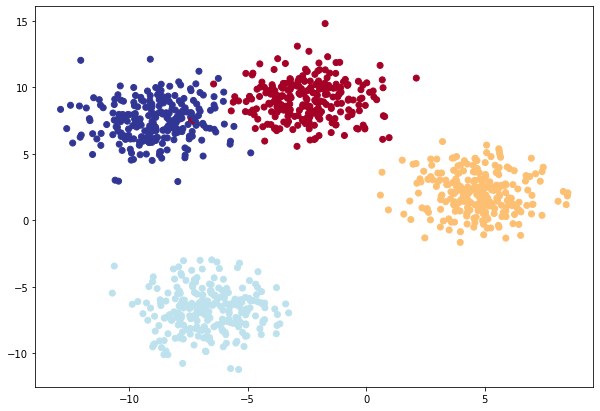

In [ ]:
from scipy.sparse.linalg.eigen import test
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set the hyperparameters for data creation
NUM_CLASSES =4
NUM_FEATURES = 2
RANDOM_SEED =42

# 1. Create a multiclass data
X_blob,y_blob =make_blobs(n_samples = 1000,
                          n_features=NUM_FEATURES,
                          centers= NUM_CLASSES,
                          cluster_std = 1.5,
                          random_state= RANDOM_SEED)

# 2.Turn data into tensor
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3.split into train and test
X_blob_train, X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,y_blob,
                                                                      test_size=0.2,
                                                                      random_state=RANDOM_SEED)

#4. plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap = plt.cm.RdYlBu);


### 8.2 building a Multiclass classification model in Pytorch

In [ ]:
# create Device agnostic code
device = "cuda" if  torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#build a multi class classification a model
class Blobmodel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """ Initialize multiclass classification model.

    Args:
      input_feature_(int) : number of input features to the model
      output_features(int) :  number of output features (number of output classes)
      hidden_units(int) : Number of hidden units between layers, default 8

    Returns:


    """
    super().__init__()
    self.linear_layer_stack =nn.Sequential(
        nn.Linear(in_features = input_features,out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units,output_features),
        )
    
  def forward(self,x):
    return self.linear_layer_stack(x)

model_4 = Blobmodel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4.parameters

<bound method Module.parameters of Blobmodel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)>

In [ ]:
X_blob_train.shape,y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and optimizer for the model

resources: https://machinelearningmastery.com/cross-entropy-for-machine-learning/

https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e

In [ ]:
# create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_4.parameters(),lr = 0.1)
loss_fn , optimizer

(CrossEntropyLoss(), SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### 8.4 getting prediction probabilites from multi-class Pytorch model
In order to evaluate and train and test our model, we need to convert our model's outputs(logits) to prediction probabilities and then to prediction labels

logits (Raw output of the model) -> pred probs(use `torch.softmax`) ->pred labels (take arg max of the prediction probabilites)

logits -> pred prob -> pred labels



In [ ]:
# Lets get the raw outputs of our model(logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

#### softmax
resources : https://machinelearningmastery.com/softmax-activation-function-with-python/

In [ ]:
#convert our model's logits to prediction probablites
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [ ]:
# Convert our models prediction probabilites to prediction labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training loop and testing loop for a multi class pytorch model

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_blob_train,y_blob_train = X_blob_train.to(device),y_blob_train.to(device)
X_blob_test , y_blob_test = X_blob_test.to(device) , y_blob_test.to(device)

epochs = 100
for epoch in range(epochs):
  model_4.train()
  '''y_logits = model_4(X_train)
  y_pred_prob = torch.softmax(y_logits,dim=1)
  y_pred = torch.argmax(y_pred_prob,dim=1)'''
  y_logits = model_4(X_train).to(device)
  y_pred =  torch.softmax(y_logits,dim=1).argmax(dim=1)

  #calculate the loss
  loss = loss_fn(y_logits,y_blob_train)
  accuracy = accuracy_fn(y_blob_train,y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    '''test_probs = torch.softmax(test_logits,dim=1)
    test_preds = torch.argmax(test_probs,dim=1)'''
    test_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_accuracy = accuracy_fn(y_blob_test,test_preds)
  if epoch % 10 == 0:
    print(f"epoch: {epoch} | Loss: {loss:.5f} | accuracy: {accuracy:.2f} | testloss: {test_loss:.5f} | testacc: {test_accuracy:.2f} ")

epoch: 0 | Loss: 1.40423 | accuracy: 25.12 | testloss: 1.15320 | testacc: 43.00 
epoch: 10 | Loss: 1.39481 | accuracy: 25.12 | testloss: 1.13809 | testacc: 51.50 
epoch: 20 | Loss: 1.38996 | accuracy: 25.12 | testloss: 1.13201 | testacc: 54.50 
epoch: 30 | Loss: 1.38745 | accuracy: 24.38 | testloss: 1.13037 | testacc: 68.50 
epoch: 40 | Loss: 1.38613 | accuracy: 24.38 | testloss: 1.13093 | testacc: 70.50 
epoch: 50 | Loss: 1.38541 | accuracy: 23.62 | testloss: 1.13245 | testacc: 71.00 
epoch: 60 | Loss: 1.38500 | accuracy: 24.00 | testloss: 1.13439 | testacc: 71.50 
epoch: 70 | Loss: 1.38473 | accuracy: 24.00 | testloss: 1.13652 | testacc: 71.50 
epoch: 80 | Loss: 1.38454 | accuracy: 24.25 | testloss: 1.13868 | testacc: 71.00 
epoch: 90 | Loss: 1.38439 | accuracy: 25.00 | testloss: 1.14077 | testacc: 71.00 


### 8.6 making and evaluating prediction 

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits =model_4(X_blob_test)
y_logits[:10]

tensor([[-9.6399e-01,  1.0081e-01, -1.7499e+00, -1.3386e+00],
        [-3.8668e-01, -4.5263e-01, -6.4721e-01, -1.4533e-01],
        [ 8.6726e-02,  3.4508e-02,  1.3138e-01,  1.0852e-02],
        [-6.0201e-01,  8.5121e-02, -1.0894e+00, -8.1574e-01],
        [-6.5256e-01, -6.5649e-01, -1.2147e+00, -4.2795e-01],
        [-4.6301e-01, -5.4581e-01, -7.7271e-01, -1.7746e-01],
        [-2.8152e-02, -1.2041e-02,  7.8792e-02,  6.0220e-04],
        [-5.2458e-01, -5.5289e-01, -9.4747e-01, -2.9965e-01],
        [ 6.0488e-02,  3.6641e-02,  9.3386e-02,  4.4303e-02],
        [-5.4730e-01, -5.6430e-01, -1.0024e+00, -3.3228e-01]], device='cuda:0')

In [ ]:
y_preds = torch.softmax(y_logits,dim=1).argmax(dim=1)

In [ ]:
y_preds[:10]

tensor([1, 3, 2, 1, 3, 3, 2, 3, 2, 3], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

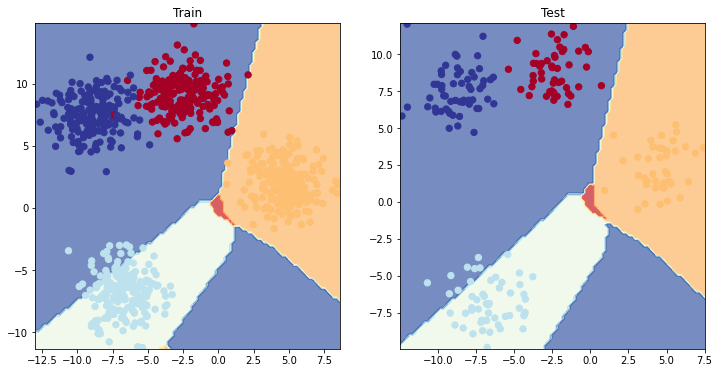

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

## 9.Classification Evaluation Methods!
A few more classification metrics ....(to evaluate our classification model)

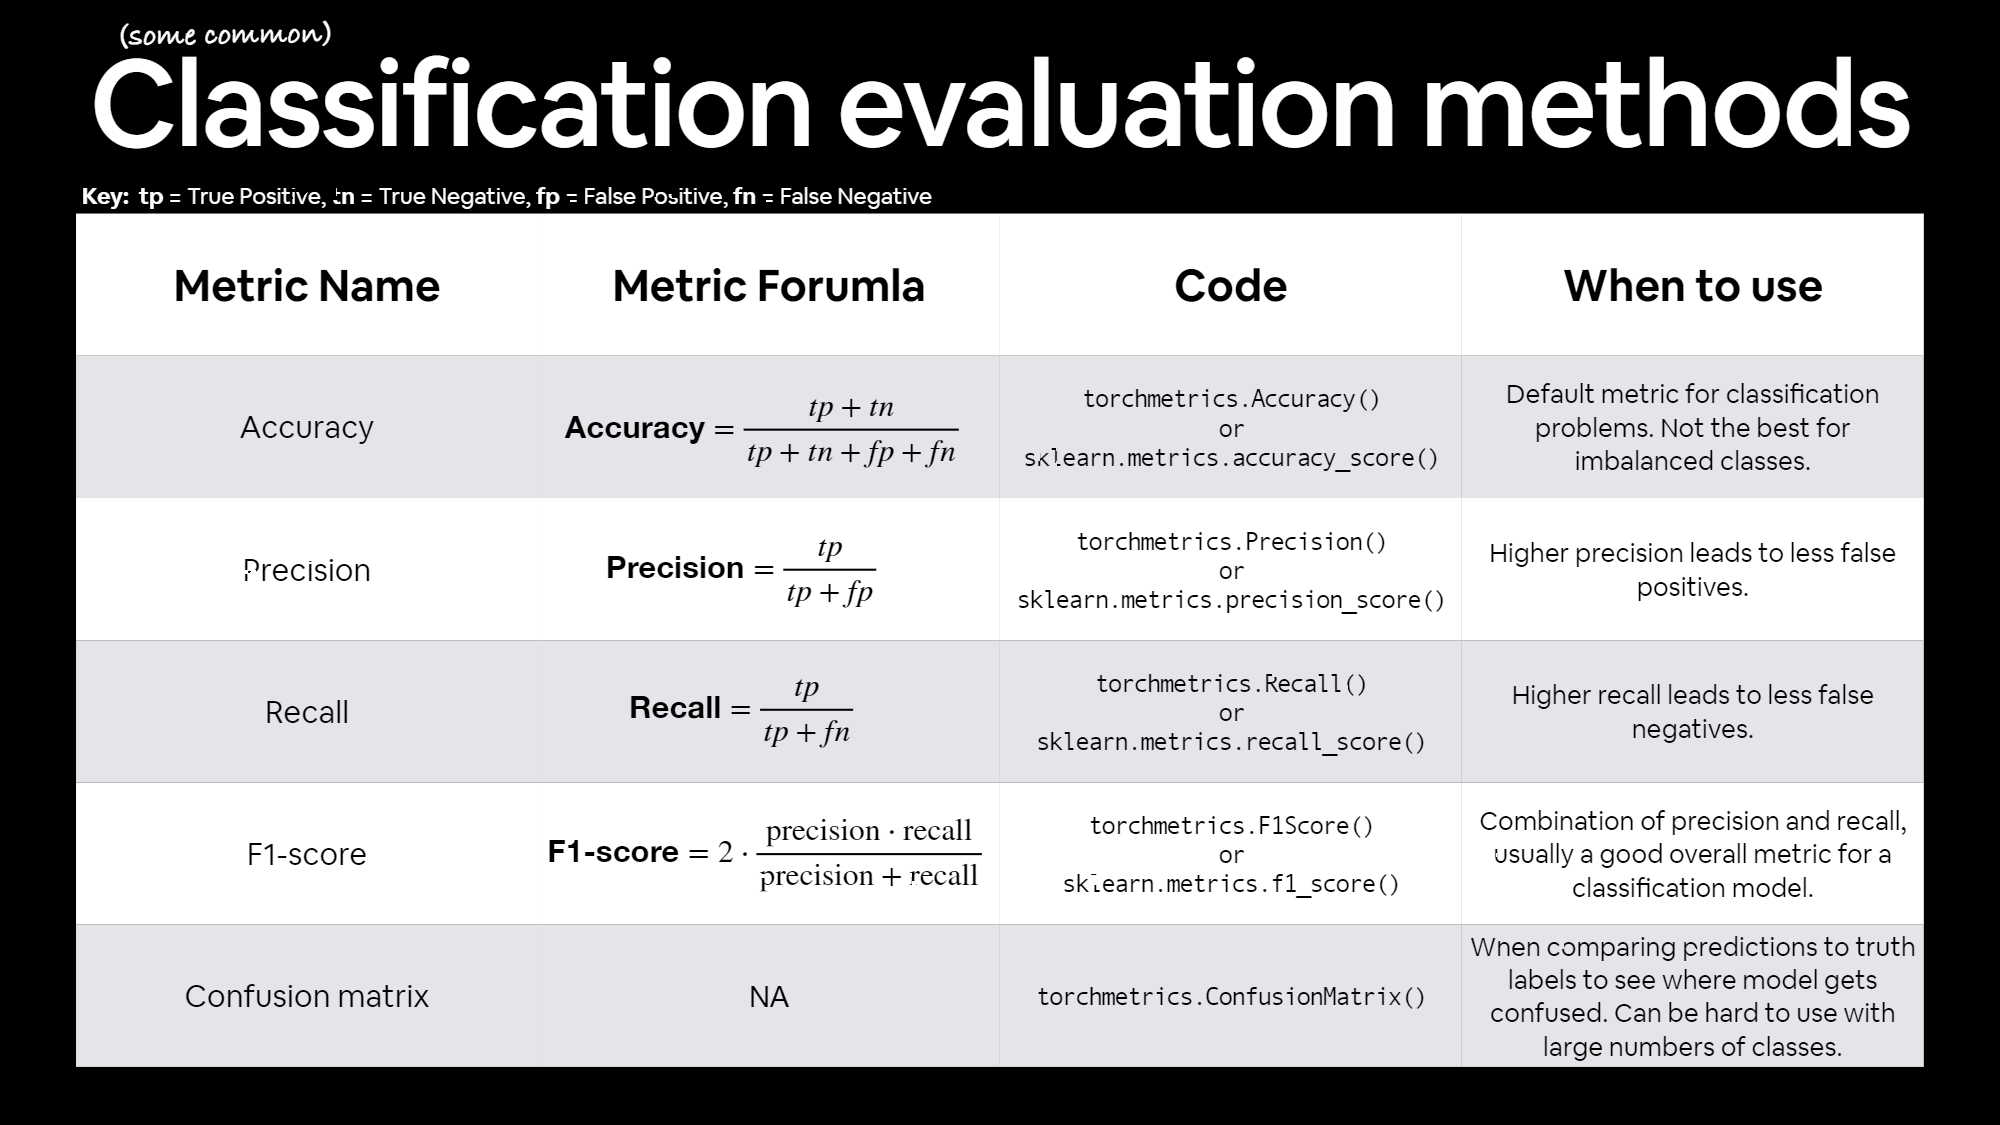

`note`
  `* tp: true postive ,tn:true negative`
  `* fp:false postive,fn:false negative`

* Accuracy - Out of 100 samples, How many of our get right
* Precision 
* Recall 
* F1-score
* Confusion matrix
* classification Report

* Resources for precision and recall:
https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/

    * **Remember precison recall tradeoff**: https://www.google.com/search?q=precison+recall+tradeoff&rlz=1C1CHBF_enUS1041US1041&oq=precison+recall+tradeoff&aqs=chrome..69i57.6699j0j4&sourceid=chrome&ie=UTF-8

* classification report : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

    https://pytorch.org/ignite/generated/ignite.metrics.ClassificationReport.html

* if you want access to a lot of Pytorch metrics, See TorchMetrics : https://torchmetrics.readthedocs.io/en/latest/

In [82]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
from torchmetrics import Accuracy

#Setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

#calucalate Accuracy
torchmetric_accuracy(y_preds,y_blob_test)

tensor(0.7100, device='cuda:0')

## Exercises and Extra-Curriculum
* Exercises : https://www.learnpytorch.io/02_pytorch_classification/#exercises

* Solved Execise : https://colab.research.google.com/drive/1dl5YhrXeOY7eYL8Bp5P4BpPKvaz8QerB?usp=sharing

* Extra-curriculum :
https://www.learnpytorch.io/02_pytorch_classification/#extra-curriculum 